### The Sparks Foundation
## Prediction using Supervised Learning
## BY SAKSHI SATAYE

# Task 1: Predicting Student Marks Based on Study Hours.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [7]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [9]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [11]:
#Checking null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
#Checking duplicate values
df.duplicated().value_counts()

False    25
Name: count, dtype: int64

## Visualizing relationship between the dependent variable and independent variable.

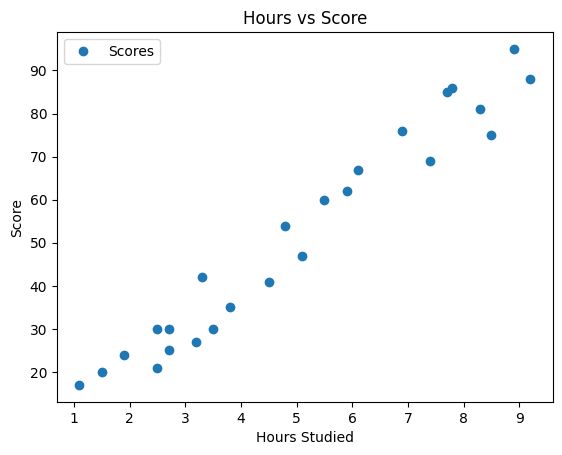

In [13]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

In [14]:
x=df[['Hours']]
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
y=df['Scores']
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

### **Splitting Data into Training and Testing Sets**

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
lr.coef_

array([10.41075981])

In [19]:
lr.intercept_

-1.5123061161277889

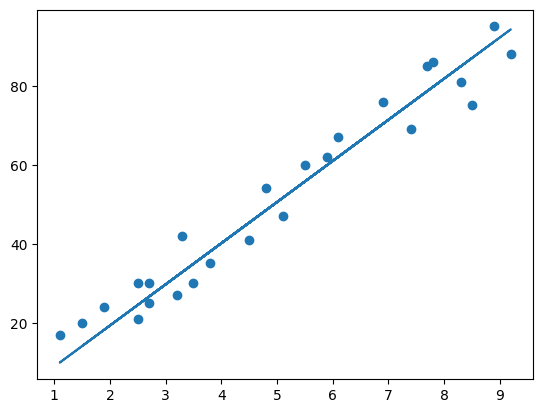

In [20]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Making Predictions**

In [21]:
print(xtest) # Testing data - In Hours
ypred =lr.predict(xtest) # Predicting the scores

    Hours
14    1.1
13    3.3
17    1.9
3     8.5
21    4.8
10    7.7
18    6.1
19    7.4


In [22]:
ypred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [23]:
# Comparing Actual vs Predicted
dff=pd.DataFrame({'Actual':ytest,'Predicted':ypred})
dff

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [25]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(ytest, ypred)) 
print('Mean Squared Error:', mean_squared_error(ytest, ypred)) 

Mean Absolute Error: 7.169048271425507
Mean Squared Error: 56.092330905646705


In [26]:
# root mean squared error
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(ytest,ypred)))

Root Mean Squared Error: 7.489481350911204


In [28]:
print('Accuracy:', r2_score(ytest, ypred)) 

Accuracy: 0.8933827573294114


### **Testing**

# What is the score when hours are 9.25?

In [30]:

h=9.25
hrs=np.array([[h]])
ypredict=lr.predict(hrs)
print(f"No of Hours = {h}")
print(f"Predicted Score = {ypredict[0]}")

No of Hours = 9.25
Predicted Score = 94.78722212956563


The predicted score if students studied for 9.25 hrs is 94.78.